# Introduction
<b> Spotify audio features to determine popularity </b>



## Problem Statement: 
What is the link of spotify’s track characteristics to it’s popularity? <br>
Is it possible to predict the popularity of a song based on spotify’s track characteristics


<b>Dataset: </b>
https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks

<b>About dataset: </b>
- Dataset contains more than 160.000 songs collected from Spotify Web API. The features include song, artist, release date as well as some characteristics of song such as acousticness, danceability, loudness, tempo and so on. Date range is from 1921 to 2020.
- Target (popularity) of the track: value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Popularity value may lag actual popularity by a few days: the value is not updated in real time.
Reference: https://developer.spotify.com/documentation/web-api/reference/tracks/get-track/




## Data Dictionary:

| KEY | VALUE TYPE |VALUE DESCRIPTION | 
|-----|------------|-------------------|
|acousticness|float|A confidence measure from 0.0 to 1.0 of whether the track is acoustic. <BR> 1.0 represents high confidence the track is acoustic.|
|artists|string|Artist of the track|
|danceability|float|How suitable a track is for dancing based on a combination of musical elements including <BR>  tempo, rhythm stability, beat strength, and overall regularity. <BR> A value of 0.0 is least danceable and 1.0 is most danceable.|
| duration_ms | int | The duration of the track in milliseconds. |
| energy | float |Measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. <BR> E.g. a Bach prelude scores low on the scale.| 
| explicit| int | 0 = No explicit content, 1 = Explicit content | 
|id|string|Id of track generated by Spotify|
|instrumentalness| float |The closer the instrumentalness value is to 1.0,  <BR> the greater likelihood the track contains no vocal content.  <BR> Values above 0.5 are intended to represent instrumental tracks <BR> Ranges from 0 to 1. |
| key | int | The estimated overall key of the track. <BR> E.g. 0 = C, 1 = C♯/D♭. If no key was detected, the value is -1. |
|liveness|float|Higher liveness values represent an increased probability that the <BR> track was performed live. A value above 0.8 provides strong likelihood <BR> that the track is live. Ranges from 0 to 1|
|loudness|float|Overall loudness of a track in decibels (dB) <BR> Values typical range between -60 and 0 db.|
|mode| int |The type of scale from which its melodic content is derived. <BR> Major is represented by 1 and minor is 0.
|name|string|Name of the track|
|popularity|int|Popularity of the track. Ranges from 0 to 100|
|release_date|string|Date of release mostly in yyyy-mm-dd format|
|speechiness|float|Detects the presence of spoken words in a track. The more exclusively speech-like the recording <BR> E.g. talk show, the closer to 1.0 the attribute value.  <BR> Ranges from 0 to 1|
|tempo|float|The overall estimated tempo of a track in beats per minute (BPM).Ranging from 50 to 150|
|valence|float|Describing the musical positiveness conveyed by a track. A measure from 0.0 to 1.0 |
|year|int|The year that the track was released in. Ranges from 1921 to 2020|


## Loading Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV



## Avoid some version change warnings
import warnings
warnings.filterwarnings('ignore', message='numpy.dtype size changed')

%matplotlib inline

## Loading Dataset

In [2]:
# Read Spotify Dataset
spotify_csv = 'data.csv'
raw_data = pd.read_csv(spotify_csv, index_col='id')

## Explore Dataset

### Head

In [3]:
raw_data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
id,,,,,,,,,,,,,,,,,,
6KbQ3uYMLKb5jDxLF7wYDD,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
6KuQTIu1KoTTkLXKrwlLPV,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
6L63VW0PibdM1HDSBoqnoM,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
6M94FkXd15sOAOQYRnWPN8,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
6N6tiFZ9vLTSOIxkj8qKrd,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


### Check Info

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 169909 entries, 6KbQ3uYMLKb5jDxLF7wYDD to 60RFlt48hm0l4Fu0JoccOl
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   instrumentalness  169909 non-null  float64
 7   key               169909 non-null  int64  
 8   liveness          169909 non-null  float64
 9   loudness          169909 non-null  float64
 10  mode              169909 non-null  int64  
 11  name              169909 non-null  object 
 12  popularity        169909 non-null  int64  
 13  release_date      169909 non-null  object 
 14  speechiness       169909 non-null  float64
 15  tempo             169909 non-null  f

In [5]:
no_attributes = ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 
       'speechiness', 'tempo', 'valence', 'year']
raw_data[no_attributes].describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
popularity,169909.0,31.556610,21.582614,0.0,12.0000,33.000000,48.0000,100.000
acousticness,169909.0,0.493214,0.376627,0.0,0.0945,0.492000,0.8880,0.996
danceability,169909.0,0.538150,0.175346,0.0,0.4170,0.548000,0.6670,0.988
duration_ms,169909.0,231406.158973,121321.923219,5108.0,171040.0000,208600.000000,262960.0000,5403500.000
energy,169909.0,0.488593,0.267390,0.0,0.2630,0.481000,0.7100,1.000
instrumentalness,169909.0,0.161937,0.309329,0.0,0.0000,0.000204,0.0868,1.000
key,169909.0,5.200519,3.515257,0.0,2.0000,5.000000,8.0000,11.000
liveness,169909.0,0.206690,0.176796,0.0,0.0984,0.135000,0.2630,1.000
loudness,169909.0,-11.370289,5.666765,-60.0,-14.4700,-10.474000,-7.1180,3.855
speechiness,169909.0,0.094058,0.149937,0.0,0.0349,0.045000,0.0754,0.969


### Check Null Values

Check whether dataset have any null values.

In [6]:
# Dataset do not have null values. 
raw_data.isnull().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

### Cleaning Dataset

In [7]:
# Artist name
# Removing '' and [] from artists to make the data more readable

raw_data['artists'] = raw_data['artists'].str.replace("[","")
raw_data['artists'] = raw_data['artists'].str.replace("]","")
raw_data['artists'] = raw_data['artists'].str.replace("'","")


In [8]:
# Artist name
# Removing '' and [] from artists to make the data more readable

raw_data['name'] = raw_data['name'].str.replace("[","")
raw_data['name'] = raw_data['name'].str.replace("]","")
raw_data['name'] = raw_data['name'].str.replace("'","")
raw_data['name'] = raw_data['name'].str.replace('"',"")
raw_data['name'] = raw_data['name'].str.replace("(","")
raw_data['name'] = raw_data['name'].str.replace(")","")

In [9]:
# Release Date
# Dropping release date, since year is a better column to use for analysing data.
raw_data.drop('release_date', axis=1, inplace=True)

In [10]:
# Duplicate name and artist 
#Noticed that there are duplicated data in the dataset with same artists and title

#Find duplicate rows with same name and artist
duplicateRowsDF = raw_data[raw_data.duplicated(subset=['name','artists'], keep=False)]

#group dup rows by name then artists
dup_rows = duplicateRowsDF[['name', 'artists']].groupby(['name', 'artists'])

#Count the number of duplicated rows
dup_rows_df= pd.DataFrame(dup_rows.size().reset_index(name = "Count"))

#count unique value in duplicated rows
count_dup_rows = dup_rows_df['name'].nunique()


# print count of duplicated rows
print('Count of duplicated rows:',len(duplicateRowsDF),'unique values')

# print unique value in duplicated rows
print('Count of unique name and artists:',count_dup_rows,'unique values')

# Show first 10 rows of duplicated rows
dup_rows_df.head(10)


Count of duplicated rows: 24715 unique values
Count of unique name and artists: 10851 unique values


,name,artists,Count
0,$outh $ide $uicide,"$uicideBoy$, Pouya",2
1,&burn with Vince Staples,"Billie Eilish, Vince Staples",2
2,...And Justice for All Remastered,Metallica,2
3,...Baby One More Time,Britney Spears,2
4,007 Shanty Town,"Desmond Dekker, The Aces",2
5,1 Thing,Amerie,2
6,"10 Préludes, Op. 23: No. 5 in G Minor. Alla ma...","Sergei Rachmaninoff, Ruth Laredo",2
7,100 Miles And Runnin,N.W.A.,2
8,100 Years,Five For Fighting,3
9,100%,Sonic Youth,2


In [11]:
# Closer look on the duplicated rows with same name and artist. Eg. 100 Years by Five For Fighting
# check example
duplicateRowsDF[duplicateRowsDF.name.isin(['100 Years','1 Thing'])].sort_values('artists')

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year
id,,,,,,,,,,,,,,,,,
1mnqraQ8oV8MX92rdOFLWW,0.107,Amerie,0.612,238760,0.961,0,0.000042,10,0.0413,-3.078,0,1 Thing,60,0.3330,129.873,0.867,2005
6ZyNjT2hYvfV5PuW84dp1E,0.115,Amerie,0.636,238747,0.946,0,0.000037,10,0.0416,-4.683,0,1 Thing,55,0.3320,125.085,0.891,2008
2lFlveK1y13WWp3vnQtrr3,0.544,Five For Fighting,0.643,244600,0.569,0,0.000022,7,0.1780,-7.459,1,100 Years,65,0.0276,120.507,0.275,2003
0B5KeB25moPkcQUnbDvj3t,0.544,Five For Fighting,0.643,244600,0.569,0,0.000022,7,0.1780,-7.459,1,100 Years,57,0.0276,120.507,0.275,2004
5gBQ3x6u7DCvMW1QoP3CpG,0.565,Five For Fighting,0.636,244173,0.559,0,0.000009,7,0.0971,-7.454,1,100 Years,40,0.0274,120.487,0.288,1997


- Same song by the same artists could be released in different years as they may have been a remastered track. Eg. For the case of track name '1 Thing' by Amelie.  As musical attributes and popularity are different it can be seen as a new track.

- Or it could be an identical song, based on identical musical attributes added on to either a compilation album or a later album such as '100 Years' by Five For Fighting. Which would need to be removed, would choose to keep the earliest version.

Removing tracks with identical musical attributes through 'name','artists','duration_ms','liveness' as both duration and liveness are good indicators for different version of songs (either recorded differently or a remix).

In [12]:
# Count of dup rows considering 'name','artists','duration_ms','liveness'
new_duplicateRowsDF= raw_data[raw_data.duplicated(subset=['name','artists','duration_ms','liveness'])]
print('Count of duplicated rows:', len(new_duplicateRowsDF))

#Dropping above duplicated rows from data, keeping only the first instance
len_data = len(raw_data)
data = raw_data
data.drop_duplicates(subset=['name','artists','duration_ms','liveness'], keep='first', inplace=True)
print('Duplicated rows dropped: ', len_data-len(data), ' entries.')

Count of duplicated rows: 3864
Duplicated rows dropped:  3864  entries.


In [13]:
# Converting duration from millisecond to minutes to make it easily understandable
data['duration_min'] = round((data['duration_ms']/60000),2)

#drop column duration_ms
data.drop('duration_ms', axis=1, inplace=True)

data.duration_min.describe()



count    166045.000000
mean          3.856636
std           2.025095
min           0.090000
25%           2.850000
50%           3.470000
75%           4.380000
max          90.060000
Name: duration_min, dtype: float64

#### Functions

In [14]:
#plot chart by mean to year
def plot_feature_by_mean(feature):
    plt.figure(figsize=(16, 8))
    sns.set(style="whitegrid")
    columns = [feature]
    for col in columns:
        x = data.groupby("year")[col].mean()
        ax= sns.lineplot(x=x.index,y=x,label=col)
    ax.set_title("{} over the years".format(feature))
    ax.set_ylabel("{} average".format(feature))
    ax.set_xlabel('Year')
    plt.show()

#plot chart by count to year    
def plot_feature_by_count(feature):
    plt.figure(figsize=(16, 8))
    sns.set(style="whitegrid")
    x = data.groupby("year")[feature].count()
    ax= sns.lineplot(x=x.index,y=x)
    ax.set_title("{} over the years".format(feature))
    ax.set_ylabel('Count')
    ax.set_xlabel('Year')
    plt.show()

#function to chart top features to popularity by sum
def cat_chart_sum (feature, top_no):
    plt.figure(figsize=(12, 8))
    sns.set(style="whitegrid")
    df = data.groupby(feature)["popularity"].sum().sort_values(ascending=False).head(top_no)
    ax = sns.barplot(x=df.values,y=df.index)
    ax.set_title('Top 10 '+feature+' by Popularity')
    ax.set_ylabel(feature)
    ax.set_xlabel('Sum of Popularity')
    plt.show()

#function to chart top features to popularity with mean
def cat_chart_mean (feature, top_no):
    plt.figure(figsize=(12, 8))
    sns.set(style="whitegrid")
    df = data.groupby(feature)["popularity"].mean().sort_values(ascending=False).head(top_no)
    ax = sns.barplot(x=df.values,y=df.index)
    ax.set_title('Top 10 '+feature+' by Popularity')
    ax.set_ylabel(feature)
    ax.set_xlabel('Popularity')
    plt.show()    
    
#plot chart for features co-efficient    
def view_coeff(X, model):
    model_coefs = pd.DataFrame({'variable': X.columns,
                                'coef': model.coef_,
                                'abs_coef': np.abs(model.coef_)})
    model_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    ax = sns.barplot(x="variable", y="coef", data=model_coefs)
    plt.xticks(rotation = 90)
    
    
def cal_mean_r2_and_RMSE (model,cv,X,y):
    train_scores = []
    train_rmse = []
    test_scores = []
    test_rmse = []
    k_fold = KFold(cv, shuffle=True)
    
    for k, (train, test) in enumerate(k_fold.split(X)):
        # Get training and test sets for X and y
        X_train = X.iloc[train, ]
        y_train = y.iloc[train, ]
        X_test = X.iloc[test, ]
        y_test = y.iloc[test, ]
        
        # Fit model with training set
        model.fit(X_train, y_train)
        
        # Make predictions with training and test set
        train_preds = model.predict(X_train)
        test_preds = model.predict(X_test)
        
        # Score R2 and RMSE on training and test sets and store in list
        train_scores.append(model.score(X_train, y_train))
        test_scores.append(model.score(X_test, y_test))
        
        train_rmse.append(mean_squared_error(y_train, train_preds, squared=False))
        test_rmse.append(mean_squared_error(y_test, test_preds, squared=False))
    #Create a metrics_df dataframe to display r2 and rmse scores
    metrics_df = pd.DataFrame({'Training R2': train_scores, 
                           'Test R2': test_scores, 
                           'Training RMSE': train_rmse, 
                           'Test RMSE': test_rmse})
                                  
    return metrics_df
    
    
    
    

#  Machine Learning

## Model - Linear regression

### Preparing model
Dropping categorical features & features with high degree of multicollinearity: 
- name
- artists
- loudness
- energy
- valence

#### Train Model & Normalisation

In [15]:
from sklearn.preprocessing import MinMaxScaler
# drop cat feature
adj_data = data.drop(['name','artists', 'loudness', 'energy','valence'], axis=1)

target_col = 'popularity'
feature_cols = [c for c in adj_data.columns if c != target_col]
columns = [
    'id','acousticness', 'danceability', 'explicit','instrumentalness',
                'key','liveness','mode','popularity','speechiness','tempo','year','duration_min'
]

index = adj_data.index

adj_data.head()


,acousticness,danceability,explicit,instrumentalness,key,liveness,mode,popularity,speechiness,tempo,year,duration_min
id,,,,,,,,,,,,
6KbQ3uYMLKb5jDxLF7wYDD,0.995,0.708,0,0.563,10,0.1510,1,0,0.0506,118.469,1928,2.64
6KuQTIu1KoTTkLXKrwlLPV,0.994,0.379,0,0.901,8,0.0763,1,0,0.0462,83.972,1928,4.70
6L63VW0PibdM1HDSBoqnoM,0.604,0.749,0,0.000,5,0.1190,0,0,0.9290,107.177,1928,1.74
6M94FkXd15sOAOQYRnWPN8,0.995,0.781,0,0.887,1,0.1110,0,0,0.0926,108.003,1928,3.01
6N6tiFZ9vLTSOIxkj8qKrd,0.990,0.210,0,0.908,11,0.0980,1,1,0.0424,62.149,1928,11.46


In [16]:
#Normalisation of X from 0-1
scaler = MinMaxScaler(feature_range=(0, 1))
normalizedData = scaler.fit_transform(adj_data)



#move the data back to a dataframe
df = pd.DataFrame.from_records(normalizedData, columns = columns[1:], index = index)
df = df[['acousticness', 'danceability', 'explicit','instrumentalness',
         'key','liveness','mode','speechiness','tempo','year','duration_min','popularity']]
df.head()

,acousticness,danceability,explicit,instrumentalness,key,liveness,mode,speechiness,tempo,year,duration_min,popularity
id,,,,,,,,,,,,
6KbQ3uYMLKb5jDxLF7wYDD,0.998996,0.716599,0.0,0.563,0.909091,0.1510,1.0,0.052219,0.485348,0.070707,0.028343,0.00
6KuQTIu1KoTTkLXKrwlLPV,0.997992,0.383603,0.0,0.901,0.727273,0.0763,1.0,0.047678,0.344019,0.070707,0.051239,0.00
6L63VW0PibdM1HDSBoqnoM,0.606426,0.758097,0.0,0.000,0.454545,0.1190,0.0,0.958720,0.439086,0.070707,0.018339,0.00
6M94FkXd15sOAOQYRnWPN8,0.998996,0.790486,0.0,0.887,0.090909,0.1110,0.0,0.095562,0.442470,0.070707,0.032455,0.00
6N6tiFZ9vLTSOIxkj8qKrd,0.993976,0.212551,0.0,0.908,1.000000,0.0980,1.0,0.043756,0.254614,0.070707,0.126375,0.01


In [17]:
X = df[feature_cols]
y = df[target_col]


#split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 2)

# #Normalisation of X from 0-1
# scaler = MinMaxScaler(feature_range=(0, 1))
# X_train_scaled = scaler.fit_transform(X_train)
# X_train = pd.DataFrame(X_train_scaled)

# X_test_scaled = scaler.fit_transform(X_test)
# X_test = pd.DataFrame(X_test_scaled)

#Build model
linreg1 = LinearRegression()

#Fit
linreg1.fit(X_train, y_train)

LinearRegression()

In [18]:
kfold = KFold(10, shuffle=True)
results_lr = cross_val_score(linreg1, X_train, y_train, cv= kfold)
print('Linear Regression, Cross-Validation mean: %.4f' % results_lr.mean())

Linear Regression, Cross-Validation mean: 0.7835


### Forward featuring for prediction

year, instrumentalness, danceability, speechiness, acousticness, liveness, explicit, mode

#### Train model

In [19]:
target_col = 'popularity'
feature_cols = ['year','acousticness', 'speechiness','danceability','instrumentalness','liveness']

X4 = df[feature_cols]
y4 = df[target_col]



#split
X_train, X_test, y_train, y_test = train_test_split(X4,y4,test_size=0.3, random_state = 2)



#Build model
linreg4 = LinearRegression()

#Fit
linreg4.fit(X_train, y_train)

##Predicting with the model
y_test_pred = linreg4.predict(X_test)


In [20]:
from IPython.display import display, Math

def get_printable_equation(data, inter, coef):
  equation = '$Popularity = ' + f'{inter:.2f} '
  
  for i, co in enumerate(coef):
    if i == len(coef) - 1:
        equation = equation + f'+ {co:.2f} {(data.columns)[i]}$'
    else:
        equation = equation + f'+ {co:.2f} {(data.columns)[i]}'

  return display(Math(equation))

get_printable_equation(X_train, linreg4.intercept_, linreg4.coef_)


<IPython.core.display.Math object>

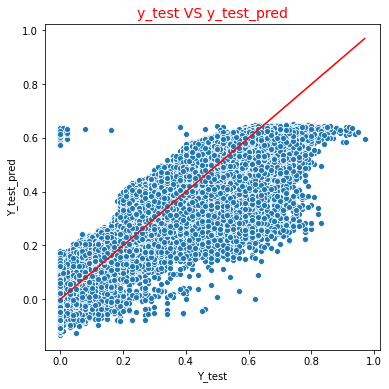

In [21]:
#plotting y_test VS y_pred
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.scatterplot(x=y_test, y=y_test_pred)
sns.lineplot(x=y_test, y=y_test, color='red', ax=ax)
ax.set_xlabel('Y_test')
ax.set_ylabel('Y_test_pred')
ax.set_title('y_test VS y_test_pred', fontsize=14, color='red')
plt.show()

#### Cross Validation

In [22]:
# Set up 10-fold cross validation  
k_fold = KFold(10, shuffle=True)
train_scores = []
train_rmse = []
test_scores = []
test_rmse = []
lr=LinearRegression()

for k, (train, test) in enumerate(k_fold.split(X4)):
    
    # Get training and test sets for X and y
    X_train = X4.iloc[train, ]
    y_train = y4.iloc[train, ]
    X_test = X4.iloc[test, ]
    y_test = y4.iloc[test, ]
    
    # Fit model with training set
    lr.fit(X_train, y_train)
    
    # Make predictions with training and test set
    train_preds = lr.predict(X_train)
    test_preds = lr.predict(X_test)
    
    # Score R2 and RMSE on training and test sets and store in list
    train_scores.append(lr.score(X_train, y_train))
    test_scores.append(lr.score(X_test, y_test))
    
    train_rmse.append(mean_squared_error(y_train, train_preds, squared=False))
    test_rmse.append(mean_squared_error(y_test, test_preds, squared=False))

# Create a metrics_df dataframe to display r2 and rmse scores
metrics_df2 = pd.DataFrame({'Training R2': train_scores, 
                           'Test R2': test_scores, 
                           'Training RMSE': train_rmse, 
                           'Test RMSE': test_rmse},
                          index=[i+1 for i in range(10)])

metrics_df2.describe()


,Training R2,Test R2,Training RMSE,Test RMSE
count,10.000000,10.000000,10.000000,10.000000
mean,0.784644,0.784611,0.099777,0.099778
std,0.000250,0.002253,0.000079,0.000711
min,0.784417,0.780490,0.099678,0.098431
25%,0.784476,0.783891,0.099715,0.099353
50%,0.784523,0.785728,0.099778,0.099773
75%,0.784725,0.786075,0.099824,0.100340
max,0.785102,0.786646,0.099926,0.100668


In [23]:
#Mean R2 and RMSE results for each model
r2_rmse_cv_10 = pd.DataFrame()
lr_df_10 = pd.DataFrame({'Linear Reg': metrics_df2.mean().round(4)})
r2_rmse_cv_10['Linear Reg']=lr_df_10['Linear Reg']
r2_rmse_cv_10

,Linear Reg
Training R2,0.7846
Test R2,0.7846
Training RMSE,0.0998
Test RMSE,0.0998


In [24]:
results_lr = cross_val_score(linreg4, X_train, y_train, cv= kfold)
print('Linear Regression, Cross-Validation mean: %.4f' % results_lr.mean())

Linear Regression, Cross-Validation mean: 0.7847


In [25]:
#CV results in each fold
cv_results_10 = pd.DataFrame()
lr_cv_10 = pd.DataFrame({'Linear Reg': results_lr.round(4)})
cv_results_10['Linear Reg'] = lr_cv_10['Linear Reg']
cv_results_10

,Linear Reg
0,0.7860
1,0.7816
2,0.7936
3,0.7800
4,0.7794
5,0.7865
6,0.7900
7,0.7873
8,0.7832
9,0.7795


In [26]:
results_lr_5 = cross_val_score(linreg4, X_train, y_train, cv= 5)
print('Linear Regression, Cross-Validation mean: %.4f' % results_lr_5.mean())

Linear Regression, Cross-Validation mean: 0.7576


#### Predict Y

Equation: 𝑃𝑜𝑝𝑢𝑙𝑎𝑟𝑖𝑡𝑦=−0.06+0.68𝑦𝑒𝑎𝑟+−0.04𝑎𝑐𝑜𝑢𝑠𝑡𝑖𝑐𝑛𝑒𝑠𝑠+−0.07𝑠𝑝𝑒𝑒𝑐ℎ𝑖𝑛𝑒𝑠𝑠+0.04𝑑𝑎𝑛𝑐𝑒𝑎𝑏𝑖𝑙𝑖𝑡𝑦+−0.03𝑖𝑛𝑠𝑡𝑟𝑢𝑚𝑒𝑛𝑡𝑎𝑙𝑛𝑒𝑠𝑠+−0.03𝑙𝑖𝑣𝑒𝑛𝑒𝑠𝑠

Example: <br>

In [27]:
X_test.index[1000]

'6FC8deipicOMOKMWuh9dte'

In [28]:
data.loc['5d9xFamkb71Pld6vSTDJrq',:]

acousticness                                                    0.974
artists                          Wolfgang Amadeus Mozart, Glenn Gould
danceability                                                    0.344
energy                                                           0.27
explicit                                                            0
instrumentalness                                                0.888
key                                                                 0
liveness                                                        0.237
loudness                                                      -23.546
mode                                                                1
name                Piano Sonata No. 1 in C Major, K. 279: III. Al...
popularity                                                         15
speechiness                                                    0.0389
tempo                                                          90.784
valence             

In [29]:
def predict(model, df, index_row):
    row = X_test.index[index_row]
    column = 'popularity'
    predictions = model.predict(X_test)
    
    r = df.loc[row,:]
    for i, c in enumerate (df.columns[:-1]):
        print('%-27s: %.4f' % (c, r[i]))
    print ('Popularity: %.4f'%df.loc[row,column])
    print ('Prediction: %.4f' %predictions[1000])

In [30]:
predict(linreg4,df, 1000)

acousticness               : 0.9438
danceability               : 0.6377
explicit                   : 0.0000
instrumentalness           : 0.7580
key                        : 0.6364
liveness                   : 0.0846
mode                       : 0.0000
speechiness                : 0.0386
tempo                      : 0.4257
year                       : 0.3939
duration_min               : 0.0647
Popularity: 0.1000
Prediction: 0.1763


## KNN

In [31]:
from sklearn.metrics import mean_squared_error
from IPython.display import display, Math

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error as mse
from numpy import mean

### Find best Neighbour

In [32]:
#Find the best neighbour

knn_RMSE_train, knn_RMSE_test = [], []
knn_test_accuracy = []
  
for i in range(1,101,5): 
        knn = KNeighborsRegressor(n_neighbors=i)
        knn.fit(X_train,y_train)
        knn_test_accuracy.append(knn.score(X_test, y_test))
        
        y_train_pred = knn.predict(X_train)
        knn_train_rmse = np.sqrt(mse(y_train, y_train_pred))
        knn_RMSE_train.append(knn_train_rmse.round(3))
        y_test_pred = knn.predict(X_test)
        knn_test_rmse = np.sqrt(mse(y_test, y_test_pred))
        knn_RMSE_test.append(knn_test_rmse.round(3))

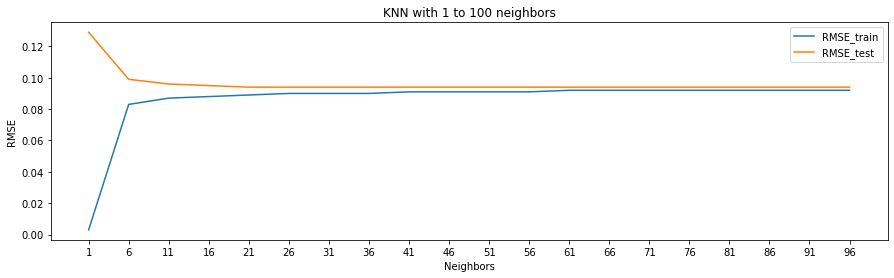

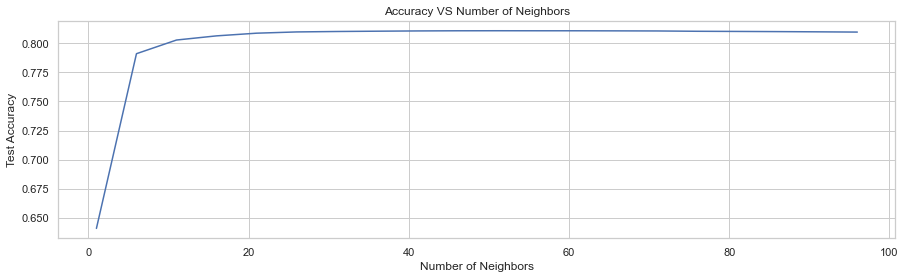

In [33]:
fig, ax = plt.subplots(figsize=(15,4))
x = np.arange(1, 101, 5)
ax = sns.lineplot(x=x, y=knn_RMSE_train)
sns.lineplot(x=x, y=knn_RMSE_test, ax=ax)
ax.legend(labels=['RMSE_train', 'RMSE_test'], bbox_to_anchor=(1, 1))
ax.set_xlabel('Neighbors')
ax.set_ylabel('RMSE')
ax.set_xticks(np.arange(1,101,5))
ax.set_title('KNN with 1 to 100 neighbors')
plt.show()

plt.figure(figsize=(15, 4))
sns.set(style="whitegrid")
plt.plot(range(1,101,5),knn_test_accuracy)
plt.xlabel('Number of Neighbors')
plt.ylabel('Test Accuracy')
plt.title('Accuracy VS Number of Neighbors')
plt.show()

### Fit Model

In [45]:
#Calculate score and RMSE, CV = 10
model_knn = KNeighborsRegressor(n_neighbors=61)
knn_metric = cal_mean_r2_and_RMSE (model_knn,10,X4,y4)

In [46]:
#Mean R2 and RMSE results for each model
knn_df_10 = pd.DataFrame({'KNN Reg': knn_metric.mean().round(4)})
r2_rmse_cv_10['KNN Reg'] = knn_df_10['KNN Reg'].values


In [47]:
r2_rmse_cv_10

,Linear Reg,KNN Reg
Training R2,0.7846,0.8185
Test R2,0.7846,0.8124
Training RMSE,0.0998,0.0916
Test RMSE,0.0998,0.0931


### CV table

#### CV = 10

In [48]:
# Mean score of cv=10
results_knn = cross_val_score(model_knn, X_train, y_train, cv= kfold)
print('KNN Regression, Cross-Validation mean: %.4f' % results_knn.mean())

KNN Regression, Cross-Validation mean: 0.8075


In [55]:
#CV results in each fold
knn_cv_10 = pd.DataFrame({'KNN Reg': results_knn.round(4)})
cv_results_10['KNN Reg'] = knn_cv_10['KNN Reg']
cv_results_10

,Linear Reg,KNN Reg
0,0.7860,0.8022
1,0.7816,0.8041
2,0.7936,0.8004
3,0.7800,0.8094
4,0.7794,0.8190
5,0.7865,0.8046
6,0.7900,0.8106
7,0.7873,0.8044
8,0.7832,0.8091
9,0.7795,0.8110


In [56]:
knn_cv_10

,KNN Reg
0,0.8022
1,0.8041
2,0.8004
3,0.8094
4,0.8190
5,0.8046
6,0.8106
7,0.8044
8,0.8091
9,0.8110


#### Comparison of CV = 5,10 with test set from 0.1 - 0.5

In [50]:

def test_split_cv(model):
    test_size = [0.1,0.2,0.3,0.4,0.5]
    cv_score_5 = pd.DataFrame()
    cv_score_10 = pd.DataFrame()
    for i in test_size:
        X_train, X_test, y_train, y_test = train_test_split(X4,y4,test_size=i, random_state = 2)
        model.fit(X_train, y_train)
        results_5 = pd.DataFrame(cross_val_score(model, X_train, y_train, cv= 5))
        cv_score_5.loc[:,i]= results_5.mean()
        results_10 = pd.DataFrame(cross_val_score(model, X_train, y_train, cv= 10))
        cv_score_10.loc[:,i]= results_10.mean()
    df5 = cv_score_5.round(4)
    df10 = cv_score_10.round(4)
    df = cv_score_5.append(cv_score_10)
    df = df.round(4)
    df.index = ['5','10'] 
    return df


In [51]:
test_split_cv(model_knn)

,0.1,0.2,0.3,0.4,0.5
5,0.8108,0.8094,0.8088,0.8078,0.8069
10,0.8114,0.8102,0.8094,0.8085,0.8075


In [52]:
test_size = [0.1,0.2,0.3,0.4,0.5]
cv_score_5 = pd.DataFrame()
# cv_score_10 = pd.DataFrame()
for i in test_size:
    X_train, X_test, y_train, y_test = train_test_split(X4,y4,test_size=i, random_state = 2)
    model_knn.fit(X_train, y_train)
    results_5 = cross_val_score(model_knn, X_train, y_train, cv= 5)
    cv_score_5[i]= results_5
#     results_10 = pd.DataFrame(cross_val_score(model_knn, X_train, y_train, cv= 10))
#     cv_score_10.loc[:,i]= results_10.mean()
df5 = cv_score_5.round(4)
# df10 = cv_score_10.round(4)



In [53]:
df5

,0.1,0.2,0.3,0.4,0.5
0,0.8135,0.8095,0.8076,0.8063,0.8130
1,0.8090,0.8086,0.8133,0.8149,0.8055
2,0.8157,0.8140,0.8079,0.8052,0.8070
3,0.8088,0.8090,0.8098,0.8085,0.8042
4,0.8072,0.8061,0.8051,0.8040,0.8046


## Print first 5 of test dataset vs prediction

In [58]:
df = pd.DataFrame(X_test[:5])
y_pred = model_knn.predict(df)
y_pred = y_pred.round(2)
df['popularity']= y_test[:5]
df['prediction']= y_pred
df


,year,acousticness,speechiness,danceability,instrumentalness,liveness,popularity,prediction
id,,,,,,,,
3XeLKdhrqMhozx8EDmyA0Y,0.848485,0.857430,0.042931,0.452429,0.000000,0.2380,0.48,0.47
7zkLpY72g6lKQbiHDqri1S,0.838384,0.944779,0.031992,0.532389,0.097000,0.1060,0.71,0.49
22br2xJWKCurbDeqERxN0n,0.191919,0.701807,0.991744,0.738866,0.000000,0.3210,0.00,0.00
6Ph1DMQe7fcEbtPI3NZLSL,0.828283,0.291165,0.040351,0.722672,0.000003,0.2560,0.54,0.49
26lTmLTSYUgcIKJAghyLJo,0.323232,0.945783,0.186791,0.597166,0.013700,0.0533,0.00,0.05
